In [1]:
%matplotlib inline
from utils.data import read_pickle
from utils.vis import import_camera_ready_settings
import seaborn as sns
import numpy as np
import pandas as pd
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
import matplotlib as mpl

sns.reset_orig()

In [2]:
import_camera_ready_settings()

In [3]:
res = read_pickle('../pickle/bpf-csmc.p')

In [4]:
bpf = {}
csmc = {}
for j in res.keys():
    bpf[j] = {}
    csmc[j] = {}
    for v in res[j].keys():
        bpf[j][v] = np.var(res[j][v]['bpf'])
        csmc[j][v] = np.var(res[j][v]['csmc'])

In [5]:
Z = pd.DataFrame(bpf)
jumps = Z.columns
log_vars = Z.index

In [6]:
W = pd.DataFrame(csmc)

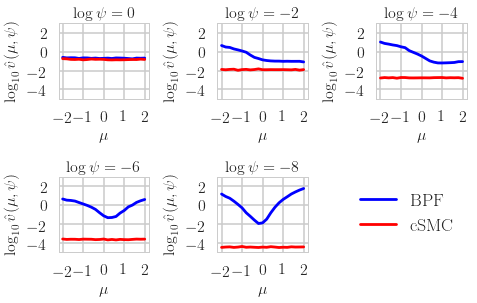

In [9]:
fig, ax = plt.subplots(2, 3, figsize=(7, 4.5))
for i, lv in enumerate([0, -2, -4, -6, -8]):
    ax[i // 3, i % 3].plot(jumps, np.log10(Z.loc[lv]), c='b')
    ax[i // 3, i % 3].plot(jumps, np.log10(W.loc[lv]), c='r')
    ax[i // 3, i % 3].set_ylabel('$\log_{10} \hat{v}(\mu, \psi)$')
    ax[i // 3, i % 3].set_xlabel('$\mu$')
    ax[i // 3, i % 3].set_title('$\log \psi = %d$' % lv)
    ax[i // 3, i % 3].set_ylim([-5, 3])
    ax[i // 3, i % 3].set_xticks([-2, -1, 0, 1, 2])
    ax[i // 3, i % 3].set_yticks([2, 0, -2, -4])
ax[-1, -1].axis('off')
ax[1, 1].legend(['BPF', 'cSMC'], bbox_to_anchor=(1.4, 1), prop={'size': 18}, loc='upper left')
plt.tight_layout()
fig.savefig('../img/bpf-vs-csmc.pdf', bbox_inches='tight')

In [ ]:
plt.legend()